# 1.Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import random
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df = train_data

# 2.Observe the dataset

In [3]:
print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3.Visualizetion

In [6]:
# 年齡、票價分級
age_div = [0,6,12,17,45,69,80]
# 嬰幼兒、小孩、青少年、青年、中老年、老年
df['Age_group'] = pd.cut(df['Age'], age_div)

# divide 
Q1 = np.percentile(df['Fare'],25)
Q2 = np.percentile(df['Fare'],50)
Q3 = np.percentile(df['Fare'],75)
IQR = Q3 - Q1
va_max = df['Fare'].max()+1
df['Fare_group'] = pd.cut(df['Fare'],[-0.001, Q1, Q2, Q3, Q3+IQR, va_max])

age_criterion = df['Age_group'].cat.categories
fare_criterion = df['Fare_group'].cat.categories
print(age_criterion)
print(fare_criterion)

df.head(3)

IntervalIndex([(0, 6], (6, 12], (12, 17], (17, 45], (45, 69], (69, 80]],
              closed='right',
              dtype='interval[int64]')
IntervalIndex([(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0], (31.0, 54.09], (54.09, 513.329]],
              closed='right',
              dtype='interval[float64]')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 45]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17, 45]","(54.09, 513.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17, 45]","(7.91, 14.454]"


<AxesSubplot:xlabel='Fare'>

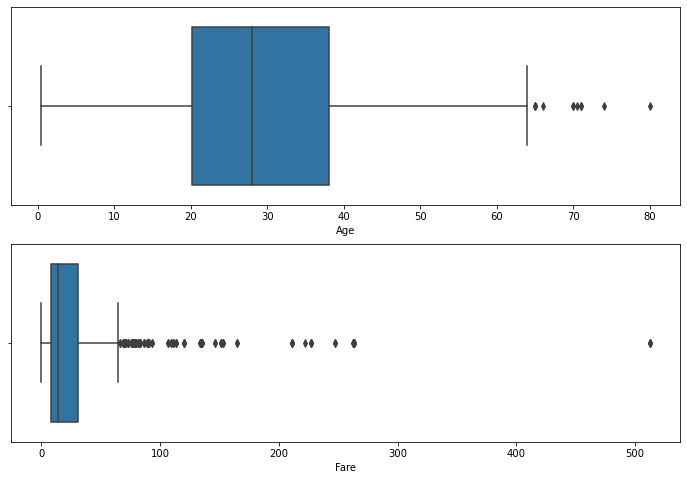

In [7]:
# draw the boxplot of fare and age
plt.figure(figsize=[12,8])
plt.subplot(2,1,1)
sns.boxplot(train_data['Age'])
plt.subplot(2,1,2)
sns.boxplot(train_data['Fare'])

### 先補年齡

In [8]:
title = df['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
df['title'] = title.str.strip() #去除兩邊空格
print(title.value_counts())

age_3 = ['Major','Col','Don','Capt','Ms','Mile','Mrs','Master','Jonkheer','Mr','Miss'] #(17, 45]
age_4 = ['Rev','Mme','the Countess','Dr'] #(45, 69]

#(17, 45]=> Major Col Don Capt Ms. Mrs. Mr、Miss
#(45, 69]=> Rev Mme the Countess 

#Mr 用於男性  
#Miss 用於未婚小姐 Mrs.已婚女性 Ms.未婚已婚婦女
#Rev牧師 Major少校  Mlle同Ms. Col上校 Don大學教師 Jonkheer女勳爵 
#Capt上尉 Mme夫人 the Countess伯爵夫人

#頭等艙乘客包括上層階級的重要成員，如貴族、富豪、政治家、高級軍官、實業家、工業家、銀行家、演藝人員、社交名流和職業運動員。
#二等艙乘客是中產階級旅客，包括普通商人、學者、作家、神職人員和遊客。
#三等艙乘客主要是貧困移民，他們計畫到美國和加拿大生活

age_div = df['Age_group'].cat.categories

for i in age_3:
    temp = df.loc[(df['title'] == i),'Age_group'].fillna(value = age_div[3])
    df.loc[(df['title'] == i),'Age_group'] = temp
for i in age_4:
    temp = df.loc[(df['title'] == i),'Age_group'].fillna(value = age_div[4])
    df.loc[(df['title'] == i),'Age_group'] = temp

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Sir               1
 Jonkheer          1
 Capt              1
 Mme               1
 Don               1
 Lady              1
 the Countess      1
 Ms                1
Name: 0, dtype: int64


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_group        0
Fare_group       0
title            0
dtype: int64

### 處理Cabin

In [10]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df['Cabin'].fillna(value='Unknown',inplace=True)
df['Cabin_group'] = df['Cabin'].str[0]
df['Cabin_group'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_group, dtype: int64

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Age_group        0
Fare_group       0
title            0
Cabin_group      0
dtype: int64

### 處理Embarked

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
#補出現次數最多的
df['Embarked'].fillna(value=df['Embarked'].value_counts().index[0],inplace=True)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Age_group        0
Fare_group       0
title            0
Cabin_group      0
dtype: int64

In [16]:
labelencoder = LabelEncoder()
df['Age_group'] = labelencoder.fit_transform(df['Age_group'])
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
labelencoder = LabelEncoder()
df['Fare_group'] = labelencoder.fit_transform(df['Fare_group'])

In [17]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,title,Cabin_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,3,0,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,4,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,3,1,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,3,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,3,1,Mr,U


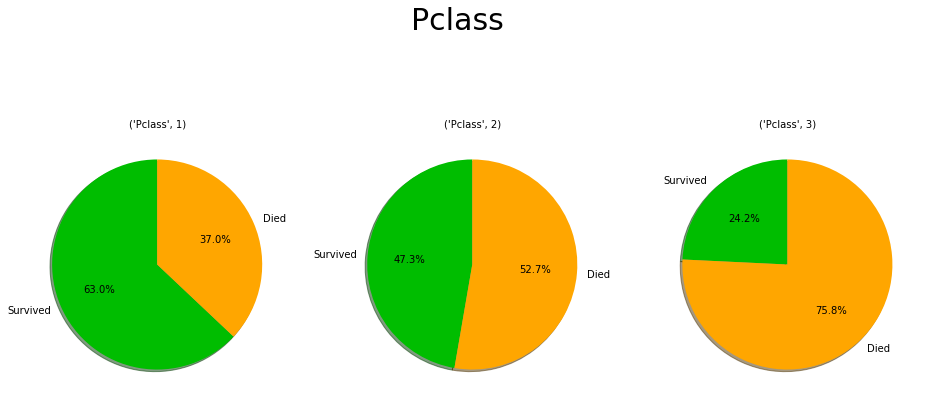

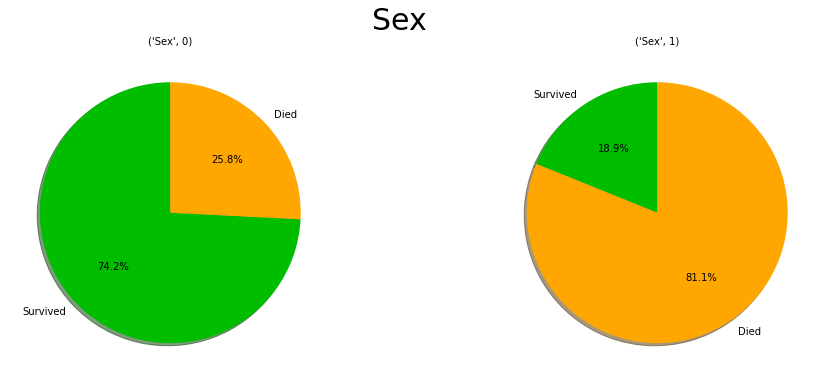

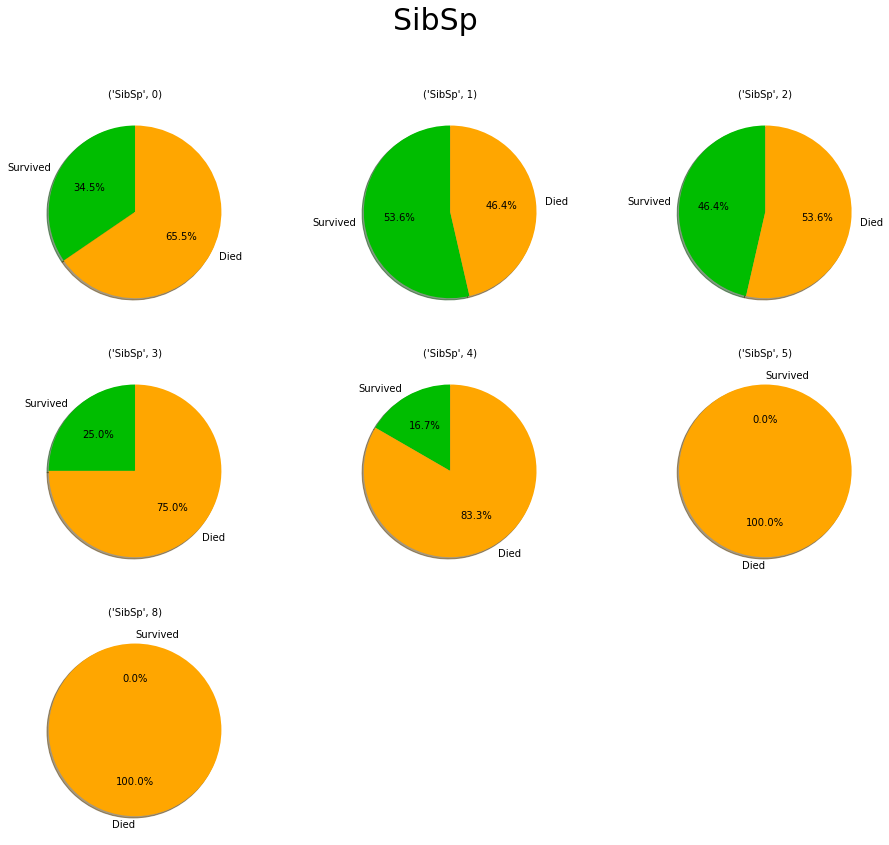

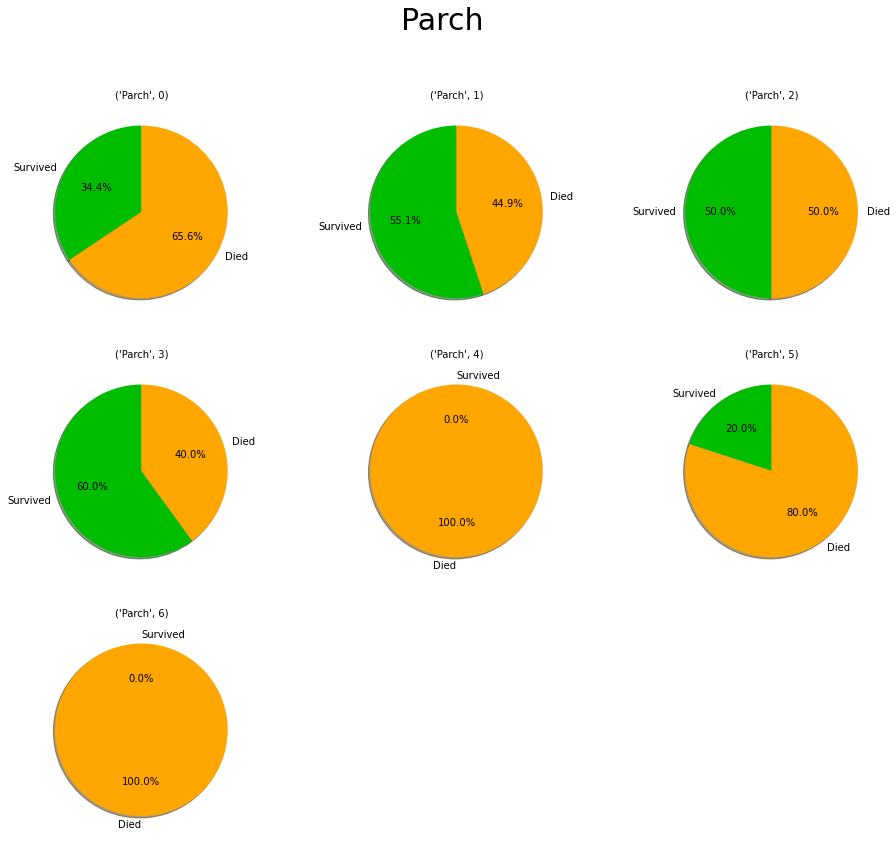

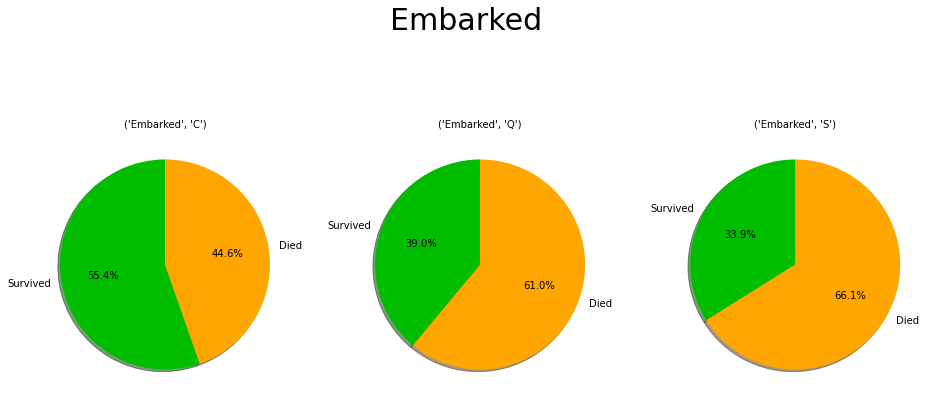

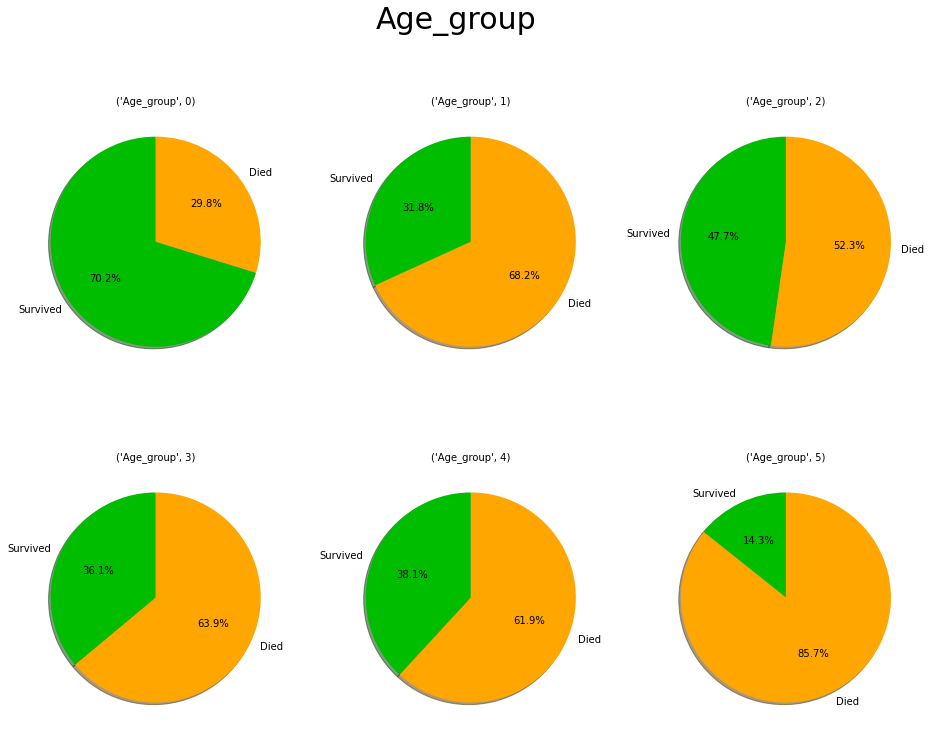

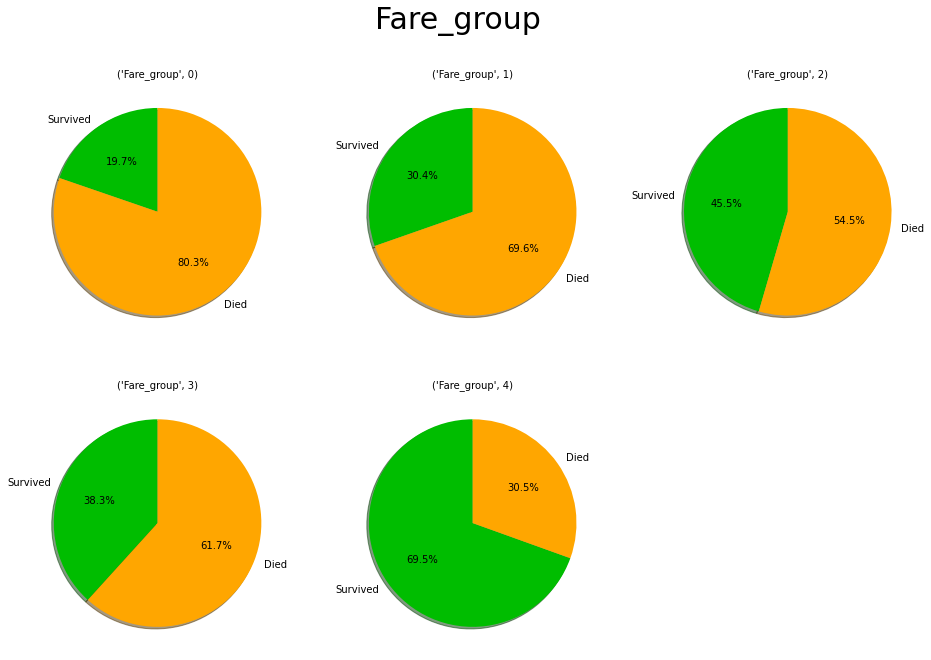

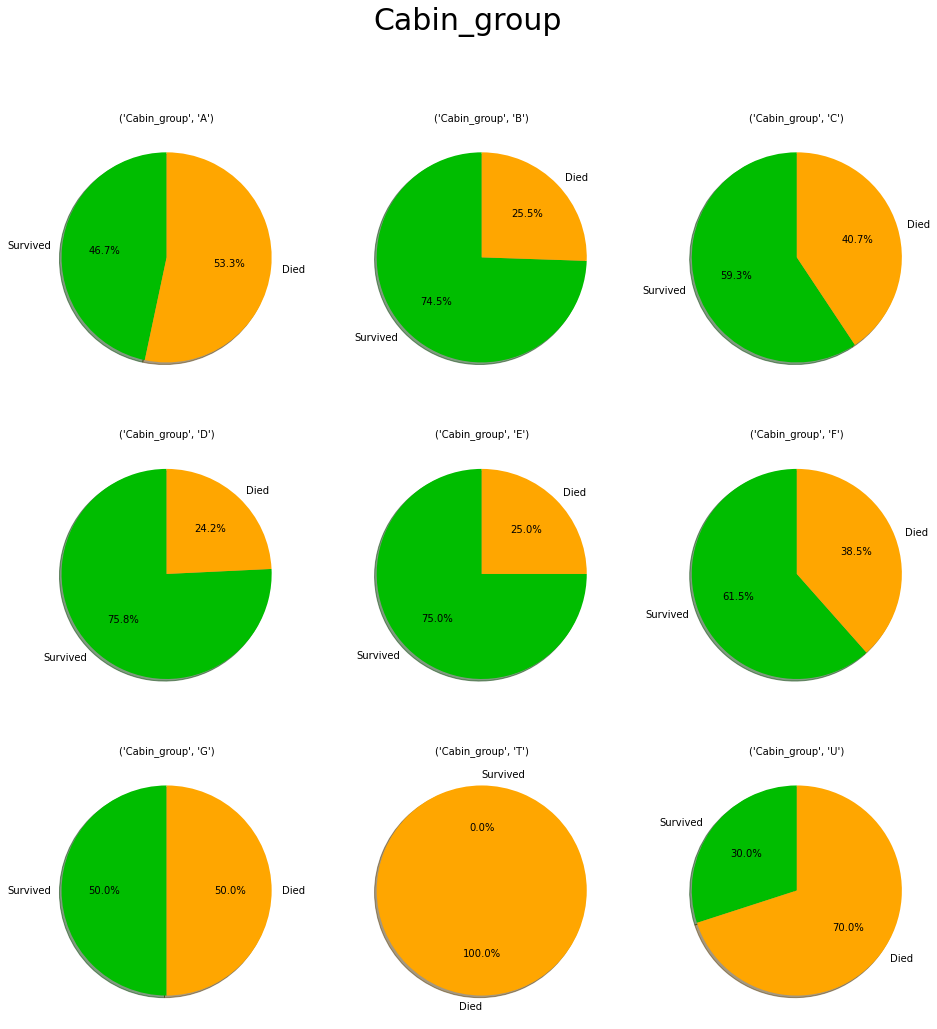

In [18]:
val = ['Pclass', 'Sex' , 'SibSp', 'Parch', 'Embarked', 'Age_group', 'Fare_group','Cabin_group']

for i in val:
    plt.figure(figsize=[16,3+1.5*len(df[i].unique())])
    k=0
    
    for j in df.sort_values(by = i)[i].unique():
        k = k + 1
        Sur =  df[df[i] == j]['Survived'].sum()
        Die =  df[df[i] == j]['Survived'].count() - df[df[i] == j]['Survived'].sum()
        
        if len(df[i].unique()) < 3:
            plt.subplot(1, len(df[i].unique()), k)
        else:
            plt.subplot(math.ceil(len(df[i].unique())/3), 3, k)
        
        plt.title(label=(i,j),fontsize=10)
        
        plt.pie(
            [Sur,Die],
            labels=["Survived","Died"], 
            colors=['#00BD00','#FFA600'],
            labeldistance=1.1, #項目標題與圓心距離設為半徑多少倍
            autopct="%2.1f%%", #項目百分比格式,%2.1f%%表示整數2位數，小數1位數
            pctdistance=0.6, #百分比文字與圓心距離為半徑多少倍
            shadow=True, 
            startangle=90 #開始繪圖的起始角度(逆時針方向)
        )
    plt.suptitle(i,fontsize=30)

由上圖可發現，存活機率: 

1.Pclass 1 > 2 > 3，且每個等級差約20%  
2.女性存活率為74.2%，遠大於男性的18.9%  
3.兄弟姊妹+配偶數總和在1、2存活率都偏大，而5、6則完全不會存活  
4.父母+子女數總合在3(含)以下都會偏高  
5.從C港口上船的存活率較另外兩者(O、S)高20%  
6.若年齡介在0到6歲存活率高達70%，而年紀高達69到80歲則僅有14%  
7.購買票價金額越高，存活率最高  
8.A、C艙室生存率較低(G、T資料量太少，無參考價值)

### 補上test data Age空值

In [19]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_data['Age_group']= pd.cut(test_data['Age'], age_criterion)
title = test_data['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
test_data['title'] = title.str.strip() #去除兩邊空格
print(title.value_counts())

age_3 = ['Major','Col','Don','Capt','Ms','Mile','Mrs','Master','Jonkheer','Mr','Miss'] # (17, 45]
age_4 = ['Rev','Mme','the Countess','Dr'] # (45, 69]

for i in age_3:
    test_data.loc[(test_data['title'] == i) & (test_data['Age'].isnull()),'Age_group'] = test_data.loc[(test_data['title'] == i) & (test_data['Age'].isnull()),'Age_group'].fillna(value = age_criterion[3])
for i in age_4:
    test_data.loc[(test_data['title'] == i) & (test_data['Age'].isnull()),'Age_group'] = test_data.loc[(test_data['title'] == i) & (test_data['Age'].isnull()),'Age_group'].fillna(value = age_criterion[4])

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dona        1
 Dr          1
Name: 0, dtype: int64


In [22]:
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = df['Fare'].mean()
test_data['Fare_group'] = pd.cut(test_data['Fare'], fare_criterion)

In [23]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_group        0
title            0
Fare_group       0
dtype: int64

In [24]:
test_data['Cabin'].fillna(value='Unknown',inplace=True)
test_data['Cabin_group'] = test_data['Cabin'].str[0]
test_data['Cabin_group'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_group, dtype: int64

In [25]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Age_group       0
title           0
Fare_group      0
Cabin_group     0
dtype: int64

In [26]:
labelencoder = LabelEncoder()
test_data['Age_group'] = labelencoder.fit_transform(test_data['Age_group'])
labelencoder = LabelEncoder()
test_data['Fare_group'] = labelencoder.fit_transform(test_data['Fare_group'])

In [27]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,title,Fare_group,Cabin_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,3,Mr,0,U
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,4,Mrs,0,U
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,4,Mr,1,U
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,3,Mr,1,U
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,3,Mrs,1,U


### XGBoost

In [28]:
train = df
test = test_data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

feature_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_group', 'Fare_group', 'Cabin_group']
model_train = pd.get_dummies(train[feature_names], columns=['Embarked', 'Cabin_group'])
model_test = pd.get_dummies(test[feature_names], columns=['Embarked', 'Cabin_group'])
model_train.drop('Cabin_group_T', axis=1, inplace=True)
labelencoder = LabelEncoder()
model_test['Sex'] = labelencoder.fit_transform(model_test['Sex'])

In [30]:
model_train

,Pclass,Sex,SibSp,Parch,Age_group,Fare_group,Embarked_C,Embarked_Q,Embarked_S,Cabin_group_A,Cabin_group_B,Cabin_group_C,Cabin_group_D,Cabin_group_E,Cabin_group_F,Cabin_group_G,Cabin_group_U
0,3,1,1,0,3,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,3,4,1,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,3,3,0,0,1,0,0,1,0,0,0,0,0
4,3,1,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
887,1,0,0,0,3,2,0,0,1,0,1,0,0,0,0,0,0
888,3,0,1,2,3,2,0,0,1,0,0,0,0,0,0,0,1
889,1,1,0,0,3,2,1,0,0,0,0,1,0,0,0,0,0


In [31]:
from xgboost import XGBClassifier

best_score = 0
best_parameter = [0, 0, 0]

for n in np.arange(50,500,50):
    for lr in np.arange(0.01,0.11,0.01):
        for dep in np.arange(3,11,1):
            xgbc = XGBClassifier(n_estimators=n, learning_rate= lr, eval_metric='auc', max_depth=dep)
            scores = cross_val_score(xgbc, model_train, train['Survived'], cv=5, scoring='accuracy')

            if scores.mean() > best_score:
                best_score = scores.mean()
                best_parameter = [n, lr, dep]

In [32]:
print(best_score)
print(best_parameter)

0.838390559286925
[200, 0.060000000000000005, 7]


In [33]:
xgbc = XGBClassifier(n_estimators=best_parameter[0], learning_rate=best_parameter[1], eval_metric='auc', max_depth=best_parameter[2])

In [34]:
print(cross_val_score(xgbc, model_train, train['Survived'], cv=5, scoring='accuracy'))
print(cross_val_score(xgbc, model_train, train['Survived'], cv=5, scoring='accuracy').mean())

[0.83240223 0.79213483 0.88202247 0.82022472 0.86516854]
0.838390559286925


In [35]:
xgbc.fit(model_train, train['Survived'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.060000000000000005,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
model_train

,Pclass,Sex,SibSp,Parch,Age_group,Fare_group,Embarked_C,Embarked_Q,Embarked_S,Cabin_group_A,Cabin_group_B,Cabin_group_C,Cabin_group_D,Cabin_group_E,Cabin_group_F,Cabin_group_G,Cabin_group_U
0,3,1,1,0,3,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,3,4,1,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,3,3,0,0,1,0,0,1,0,0,0,0,0
4,3,1,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,0,1
887,1,0,0,0,3,2,0,0,1,0,1,0,0,0,0,0,0
888,3,0,1,2,3,2,0,0,1,0,0,0,0,0,0,0,1
889,1,1,0,0,3,2,1,0,0,0,0,1,0,0,0,0,0


In [37]:
# generate answer to submit result to kaggle
import csv

with open('final_answer_XGB.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Passenger', 'Survived'])
    for x, y in zip(test_data.PassengerId.values, xgbc.predict(model_test)):
        writer.writerow([x, y])
    


### BPN

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizer_v2 import rmsprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [39]:
model = Sequential()

model.add(Dense(128, input_shape=(17,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 1

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(model_train, train['Survived'],
                   epochs=500,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 0s 24ms/step - loss: 0.7419 - acc: 0.5225 - val_loss: 0.5993 - val_acc: 0.6425
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.6453 - acc: 0.6404 - val_loss: 0.5278 - val_acc: 0.7598
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5877 - acc: 0.6840 - val_loss: 0.4841 - val_acc: 0.7598
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5752 - acc: 0.7135 - val_loss: 0.4631 - val_acc: 0.7542
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5454 - acc: 0.7219 - val_loss: 0.4488 - val_acc: 0.7709
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5255 - acc: 0.7472 - val_loss: 0.4331 - val_acc: 0.7709
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5144 - acc: 0.7360 - val_loss: 0.4190 - val_acc: 0.7989
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5023 - acc: 0.7612 - va

6/6 [==============================] - 0s 4ms/step - loss: 0.3747 - acc: 0.8483 - val_loss: 0.3568 - val_acc: 0.8659
Epoch 65/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3499 - acc: 0.8553 - val_loss: 0.3602 - val_acc: 0.8659
Epoch 66/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3648 - acc: 0.8441 - val_loss: 0.3636 - val_acc: 0.8659
Epoch 67/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3621 - acc: 0.8469 - val_loss: 0.3695 - val_acc: 0.8715
Epoch 68/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3514 - acc: 0.8567 - val_loss: 0.3689 - val_acc: 0.8659
Epoch 69/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3621 - acc: 0.8483 - val_loss: 0.3748 - val_acc: 0.8715
Epoch 70/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3593 - acc: 0.8455 - val_loss: 0.3704 - val_acc: 0.8603
Epoch 71/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3527 - acc: 0.8497 - val_loss

Epoch 127/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3242 - acc: 0.8680 - val_loss: 0.4005 - val_acc: 0.8547
Epoch 128/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3165 - acc: 0.8736 - val_loss: 0.4069 - val_acc: 0.8547
Epoch 129/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3223 - acc: 0.8694 - val_loss: 0.4188 - val_acc: 0.8659
Epoch 130/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3312 - acc: 0.8722 - val_loss: 0.4176 - val_acc: 0.8547
Epoch 131/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3299 - acc: 0.8666 - val_loss: 0.4100 - val_acc: 0.8547
Epoch 132/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3313 - acc: 0.8638 - val_loss: 0.4116 - val_acc: 0.8603
Epoch 133/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3292 - acc: 0.8666 - val_loss: 0.4134 - val_acc: 0.8603
Epoch 134/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3229 - a

6/6 [==============================] - 0s 4ms/step - loss: 0.3033 - acc: 0.8778 - val_loss: 0.4291 - val_acc: 0.8603
Epoch 190/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3284 - acc: 0.8750 - val_loss: 0.4330 - val_acc: 0.8547
Epoch 191/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2987 - acc: 0.8694 - val_loss: 0.4450 - val_acc: 0.8492
Epoch 192/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3228 - acc: 0.8694 - val_loss: 0.4354 - val_acc: 0.8547
Epoch 193/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3166 - acc: 0.8722 - val_loss: 0.4417 - val_acc: 0.8547
Epoch 194/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3277 - acc: 0.8652 - val_loss: 0.4390 - val_acc: 0.8603
Epoch 195/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3219 - acc: 0.8680 - val_loss: 0.4242 - val_acc: 0.8547
Epoch 196/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3078 - acc: 0.8862 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.3096 - acc: 0.8764 - val_loss: 0.4640 - val_acc: 0.8547
Epoch 252/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3005 - acc: 0.8862 - val_loss: 0.4745 - val_acc: 0.8547
Epoch 253/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2973 - acc: 0.8806 - val_loss: 0.4748 - val_acc: 0.8492
Epoch 254/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2835 - acc: 0.8947 - val_loss: 0.4810 - val_acc: 0.8492
Epoch 255/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3096 - acc: 0.8778 - val_loss: 0.4717 - val_acc: 0.8547
Epoch 256/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2937 - acc: 0.8834 - val_loss: 0.4847 - val_acc: 0.8547
Epoch 257/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2940 - acc: 0.8862 - val_loss: 0.4894 - val_acc: 0.8547
Epoch 258/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2990 - acc: 0.8820 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.2851 - acc: 0.8904 - val_loss: 0.4841 - val_acc: 0.8547
Epoch 314/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2909 - acc: 0.8792 - val_loss: 0.5076 - val_acc: 0.8547
Epoch 315/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2873 - acc: 0.8834 - val_loss: 0.4988 - val_acc: 0.8603
Epoch 316/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3022 - acc: 0.8778 - val_loss: 0.4973 - val_acc: 0.8436
Epoch 317/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2872 - acc: 0.8862 - val_loss: 0.4898 - val_acc: 0.8436
Epoch 318/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3004 - acc: 0.8764 - val_loss: 0.4960 - val_acc: 0.8547
Epoch 319/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2784 - acc: 0.8961 - val_loss: 0.4850 - val_acc: 0.8547
Epoch 320/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2926 - acc: 0.8862 - v

6/6 [==============================] - 0s 4ms/step - loss: 0.2858 - acc: 0.8792 - val_loss: 0.5119 - val_acc: 0.8547
Epoch 376/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2951 - acc: 0.8919 - val_loss: 0.5291 - val_acc: 0.8436
Epoch 377/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2762 - acc: 0.9017 - val_loss: 0.5138 - val_acc: 0.8547
Epoch 378/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2768 - acc: 0.9017 - val_loss: 0.4968 - val_acc: 0.8659
Epoch 379/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2796 - acc: 0.8947 - val_loss: 0.5164 - val_acc: 0.8436
Epoch 380/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2725 - acc: 0.8947 - val_loss: 0.5502 - val_acc: 0.8380
Epoch 381/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2723 - acc: 0.9045 - val_loss: 0.5598 - val_acc: 0.8380
Epoch 382/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2839 - acc: 0.8876 - v

6/6 [==============================] - 0s 5ms/step - loss: 0.2952 - acc: 0.8933 - val_loss: 0.5224 - val_acc: 0.8547
Epoch 438/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2745 - acc: 0.8933 - val_loss: 0.5159 - val_acc: 0.8603
Epoch 439/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2774 - acc: 0.8876 - val_loss: 0.5180 - val_acc: 0.8547
Epoch 440/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2698 - acc: 0.8933 - val_loss: 0.5361 - val_acc: 0.8603
Epoch 441/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2812 - acc: 0.8890 - val_loss: 0.5451 - val_acc: 0.8603
Epoch 442/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2817 - acc: 0.8919 - val_loss: 0.5319 - val_acc: 0.8659
Epoch 443/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2769 - acc: 0.8947 - val_loss: 0.5205 - val_acc: 0.8547
Epoch 444/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2889 - acc: 0.8919 - v

6/6 [==============================] - 0s 5ms/step - loss: 0.2656 - acc: 0.8975 - val_loss: 0.5796 - val_acc: 0.8603
Epoch 500/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2748 - acc: 0.8890 - val_loss: 0.5995 - val_acc: 0.8603


<Figure size 432x288 with 0 Axes>

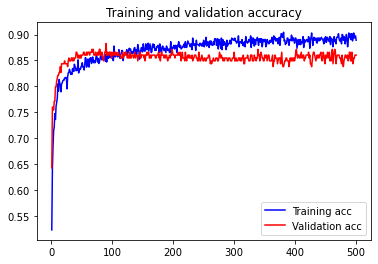

<Figure size 432x288 with 0 Axes>

In [41]:
### plot the figure

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [42]:
def task_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(17,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(8))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
    
    return model

estimators = []
estimators.append(('BPN', KerasClassifier(build_fn=task_model, epochs=200, batch_size=128, verbose=0)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, model_train, train['Survived'], cv=5)
print(results)
print(results.mean())

[0.79888266 0.79213482 0.82584268 0.77528089 0.87640452]
0.8137091159820556


In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(model_train, train['Survived'],
                   epochs=150,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/150
6/6 [==============================] - 0s 22ms/step - loss: 0.2873 - acc: 0.8933 - val_loss: 0.5626 - val_acc: 0.8547
Epoch 2/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2756 - acc: 0.8876 - val_loss: 0.5376 - val_acc: 0.8603
Epoch 3/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2590 - acc: 0.9003 - val_loss: 0.5839 - val_acc: 0.8492
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2782 - acc: 0.8975 - val_loss: 0.5946 - val_acc: 0.8492
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2767 - acc: 0.8975 - val_loss: 0.5567 - val_acc: 0.8547
Epoch 6/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2829 - acc: 0.8820 - val_loss: 0.5461 - val_acc: 0.8603
Epoch 7/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2739 - acc: 0.8933 - val_loss: 0.5811 - val_acc: 0.8547
Epoch 8/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2549 - acc: 0.8919 - va

6/6 [==============================] - 0s 5ms/step - loss: 0.2627 - acc: 0.8890 - val_loss: 0.6013 - val_acc: 0.8547
Epoch 65/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2590 - acc: 0.9003 - val_loss: 0.6165 - val_acc: 0.8492
Epoch 66/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2725 - acc: 0.8919 - val_loss: 0.6352 - val_acc: 0.8492
Epoch 67/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2694 - acc: 0.8933 - val_loss: 0.6248 - val_acc: 0.8492
Epoch 68/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2444 - acc: 0.8989 - val_loss: 0.6250 - val_acc: 0.8492
Epoch 69/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2736 - acc: 0.8848 - val_loss: 0.6321 - val_acc: 0.8492
Epoch 70/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2662 - acc: 0.8989 - val_loss: 0.6587 - val_acc: 0.8547
Epoch 71/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.8904 - val_loss

Epoch 127/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.8933 - val_loss: 0.6478 - val_acc: 0.8547
Epoch 128/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2590 - acc: 0.8961 - val_loss: 0.6463 - val_acc: 0.8547
Epoch 129/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2578 - acc: 0.8820 - val_loss: 0.6491 - val_acc: 0.8436
Epoch 130/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2553 - acc: 0.9003 - val_loss: 0.6608 - val_acc: 0.8492
Epoch 131/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2623 - acc: 0.8989 - val_loss: 0.6592 - val_acc: 0.8436
Epoch 132/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2640 - acc: 0.8961 - val_loss: 0.6737 - val_acc: 0.8436
Epoch 133/150
6/6 [==============================] - 0s 5ms/step - loss: 0.2470 - acc: 0.8989 - val_loss: 0.6590 - val_acc: 0.8547
Epoch 134/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2556 - a

In [44]:
# generate answer to submit result to kaggle
import csv

with open('final_answer_BPN.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId', 'Survived'])
    for x, y in zip(test_data.PassengerId.values, [0 if x < 0.5 else 1 for x in model.predict(model_test)]):
        writer.writerow([x, y])
    

### Tune the BPN model

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizer_v2 import rmsprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [46]:
model = Sequential()

model.add(Dense(128, input_shape=(17,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               2304      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,945
Trainable params: 2,689
Non-trainable params: 256
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(model_train, train['Survived'],
                   epochs=500,
                   batch_size=256,
                   validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 0s 52ms/step - loss: 0.9210 - acc: 0.4326 - val_loss: 0.6363 - val_acc: 0.6536
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 0.7822 - acc: 0.5449 - val_loss: 0.6099 - val_acc: 0.6480
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6888 - acc: 0.6236 - val_loss: 0.5908 - val_acc: 0.6536
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6686 - acc: 0.6756 - val_loss: 0.5780 - val_acc: 0.6480
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6182 - acc: 0.6896 - val_loss: 0.5711 - val_acc: 0.6425
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6194 - acc: 0.7121 - val_loss: 0.5683 - val_acc: 0.6425
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 0.5726 - acc: 0.7289 - val_loss: 0.5688 - val_acc: 0.6425
Epoch 8/500
3/3 [==============================] - 0s 10ms/step - loss: 0.5543 - acc: 0.7416 

Epoch 64/500
3/3 [==============================] - 0s 10ms/step - loss: 0.4131 - acc: 0.8244 - val_loss: 0.4425 - val_acc: 0.7821
Epoch 65/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3977 - acc: 0.8315 - val_loss: 0.4392 - val_acc: 0.7877
Epoch 66/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4166 - acc: 0.8272 - val_loss: 0.4359 - val_acc: 0.7877
Epoch 67/500
3/3 [==============================] - 0s 10ms/step - loss: 0.4066 - acc: 0.8188 - val_loss: 0.4327 - val_acc: 0.7933
Epoch 68/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3995 - acc: 0.8287 - val_loss: 0.4297 - val_acc: 0.7933
Epoch 69/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4230 - acc: 0.8230 - val_loss: 0.4271 - val_acc: 0.7989
Epoch 70/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4063 - acc: 0.8216 - val_loss: 0.4247 - val_acc: 0.7989
Epoch 71/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4147 - acc: 0.

3/3 [==============================] - 0s 9ms/step - loss: 0.3644 - acc: 0.8581 - val_loss: 0.3545 - val_acc: 0.8603
Epoch 127/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3750 - acc: 0.8413 - val_loss: 0.3539 - val_acc: 0.8603
Epoch 128/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3856 - acc: 0.8441 - val_loss: 0.3535 - val_acc: 0.8603
Epoch 129/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3893 - acc: 0.8399 - val_loss: 0.3536 - val_acc: 0.8603
Epoch 130/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3792 - acc: 0.8455 - val_loss: 0.3539 - val_acc: 0.8603
Epoch 131/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3623 - acc: 0.8483 - val_loss: 0.3544 - val_acc: 0.8603
Epoch 132/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3702 - acc: 0.8539 - val_loss: 0.3549 - val_acc: 0.8603
Epoch 133/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3853 - acc: 0.8427 

3/3 [==============================] - 0s 9ms/step - loss: 0.3491 - acc: 0.8483 - val_loss: 0.3565 - val_acc: 0.8827
Epoch 189/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3566 - acc: 0.8525 - val_loss: 0.3574 - val_acc: 0.8827
Epoch 190/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3513 - acc: 0.8581 - val_loss: 0.3578 - val_acc: 0.8771
Epoch 191/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3513 - acc: 0.8624 - val_loss: 0.3589 - val_acc: 0.8771
Epoch 192/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3512 - acc: 0.8596 - val_loss: 0.3596 - val_acc: 0.8771
Epoch 193/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3521 - acc: 0.8539 - val_loss: 0.3601 - val_acc: 0.8771
Epoch 194/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3617 - acc: 0.8511 - val_loss: 0.3601 - val_acc: 0.8771
Epoch 195/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3553 - acc: 0.8497 - 

3/3 [==============================] - 0s 11ms/step - loss: 0.3448 - acc: 0.8680 - val_loss: 0.3881 - val_acc: 0.8715
Epoch 251/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3518 - acc: 0.8553 - val_loss: 0.3885 - val_acc: 0.8715
Epoch 252/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3466 - acc: 0.8483 - val_loss: 0.3894 - val_acc: 0.8715
Epoch 253/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3451 - acc: 0.8596 - val_loss: 0.3898 - val_acc: 0.8715
Epoch 254/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3490 - acc: 0.8567 - val_loss: 0.3889 - val_acc: 0.8715
Epoch 255/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3420 - acc: 0.8610 - val_loss: 0.3867 - val_acc: 0.8659
Epoch 256/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3481 - acc: 0.8694 - val_loss: 0.3854 - val_acc: 0.8715
Epoch 257/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3402 - acc: 0.8567 -

3/3 [==============================] - 0s 9ms/step - loss: 0.3383 - acc: 0.8539 - val_loss: 0.4036 - val_acc: 0.8715
Epoch 313/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3288 - acc: 0.8680 - val_loss: 0.4053 - val_acc: 0.8715
Epoch 314/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3131 - acc: 0.8610 - val_loss: 0.4092 - val_acc: 0.8715
Epoch 315/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3363 - acc: 0.8666 - val_loss: 0.4123 - val_acc: 0.8715
Epoch 316/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3514 - acc: 0.8567 - val_loss: 0.4141 - val_acc: 0.8715
Epoch 317/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3384 - acc: 0.8567 - val_loss: 0.4135 - val_acc: 0.8771
Epoch 318/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3264 - acc: 0.8652 - val_loss: 0.4132 - val_acc: 0.8715
Epoch 319/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3515 - acc: 0.8638 - 

3/3 [==============================] - 0s 9ms/step - loss: 0.3275 - acc: 0.8694 - val_loss: 0.4341 - val_acc: 0.8771
Epoch 375/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3259 - acc: 0.8694 - val_loss: 0.4343 - val_acc: 0.8771
Epoch 376/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3396 - acc: 0.8567 - val_loss: 0.4338 - val_acc: 0.8771
Epoch 377/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3201 - acc: 0.8652 - val_loss: 0.4342 - val_acc: 0.8771
Epoch 378/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3433 - acc: 0.8525 - val_loss: 0.4333 - val_acc: 0.8771
Epoch 379/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3327 - acc: 0.8708 - val_loss: 0.4322 - val_acc: 0.8715
Epoch 380/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3297 - acc: 0.8680 - val_loss: 0.4309 - val_acc: 0.8715
Epoch 381/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3351 - acc: 0.8581 - v

3/3 [==============================] - 0s 9ms/step - loss: 0.3399 - acc: 0.8596 - val_loss: 0.4542 - val_acc: 0.8715
Epoch 437/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3380 - acc: 0.8581 - val_loss: 0.4527 - val_acc: 0.8715
Epoch 438/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3202 - acc: 0.8680 - val_loss: 0.4522 - val_acc: 0.8715
Epoch 439/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3465 - acc: 0.8567 - val_loss: 0.4514 - val_acc: 0.8715
Epoch 440/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3260 - acc: 0.8694 - val_loss: 0.4495 - val_acc: 0.8715
Epoch 441/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3244 - acc: 0.8708 - val_loss: 0.4470 - val_acc: 0.8715
Epoch 442/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3262 - acc: 0.8694 - val_loss: 0.4454 - val_acc: 0.8715
Epoch 443/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3194 - acc: 0.8722

3/3 [==============================] - 0s 8ms/step - loss: 0.3145 - acc: 0.8596 - val_loss: 0.4643 - val_acc: 0.8659
Epoch 499/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3117 - acc: 0.8792 - val_loss: 0.4702 - val_acc: 0.8659
Epoch 500/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3230 - acc: 0.8596 - val_loss: 0.4727 - val_acc: 0.8715


<Figure size 432x288 with 0 Axes>

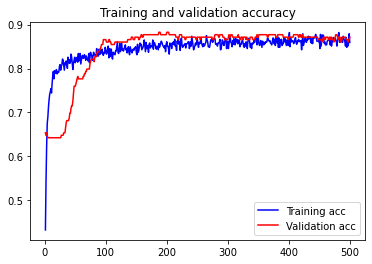

<Figure size 432x288 with 0 Axes>

In [48]:
### plot the figure

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [49]:
def task_model():
    model = Sequential()

    model.add(Dense(128, input_shape=(17,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
    
    return model

estimators = []
estimators.append(('BPN', KerasClassifier(build_fn=task_model, epochs=200, batch_size=256, verbose=0)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, model_train, train['Survived'], cv=5)
print(results)
print(results.mean())

[0.78770947 0.8202247  0.81460673 0.78089887 0.87640452]
0.8159688591957093


In [50]:
# generate answer to submit result to kaggle
import csv

with open('final_answer_BPN_2.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId', 'Survived'])
    for x, y in zip(test_data.PassengerId.values, [0 if x < 0.5 else 1 for x in model.predict(model_test)]):
        writer.writerow([x, y])